# Task

In [121]:
import pandas as pd
from utils import expand_dataset
import numpy as np

In [122]:
df_business = pd.read_csv('../dataset/df_business_final.csv')

In [123]:
print(df_business.shape)
df_business.head(5)

(150346, 66)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,stars,state,street,touristy,trendy,upscale,valet,vegan,vegetarian,video
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,MO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
def filter_by_city(city, df):
    return df[df['city'].str.contains(city) == True]


df_business_filtered = filter_by_city('Tucson', df_business)

print(df_business_filtered.shape)

df_business_filtered.head(5)

(9262, 66)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,stars,state,street,touristy,trendy,upscale,valet,vegan,vegetarian,video
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Drop non number features

In [125]:
to_drop = ['business_id', 'address', 'categories', 'city', 'latitude', 'longitude', 'name', 'state', 'postal_code']

df_business_dropped = df_business_filtered.drop(to_drop, axis=1)

# Utils (duplicated from user_task)


In [126]:
from itertools import combinations

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


def score_plot_and_get_best(data_frame, algorithm, number_of_tests):
    if algorithm == "kmeans":
        parameter_to_detect = "n_clusters"
    else:
        parameter_to_detect = "eps"

    # fitted_kmeans = {}
    labels = {}
    df_scores = []
    inertias_for_kmeans = []

    for i in number_of_tests:
        if algorithm == "kmeans":
            model = KMeans(n_clusters=i)
        else:
            model = DBSCAN(eps=i, min_samples=10)

        i_labels = model.fit_predict(data_frame)

        if algorithm == "kmeans":
            inertias_for_kmeans.append(model.inertia_)

        # Insert fitted model and calculated cluster labels in dictionaries, for further reference.
        # fitted_kmeans[i] = kmeans
        labels[i] = i_labels

        # Calculate various scores, and save them for further reference.
        df_scores.append({
            parameter_to_detect: i,
            "silhouette_score": silhouette_score(data_frame, i_labels),
            "calinski_harabasz_score": calinski_harabasz_score(data_frame, i_labels),
            "davies_bouldin_score": davies_bouldin_score(data_frame, i_labels),
        })

    # Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
    df_scores = pd.DataFrame(df_scores)
    df_scores.set_index(parameter_to_detect, inplace=True)

    print(df_scores)

    if algorithm == "kmeans":
        # Plot inertias
        plt.plot(number_of_tests, inertias_for_kmeans, 'bx-')
        plt.title('Inertias')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')

    best_scores_list = [
        df_scores["silhouette_score"].idxmax(),
        df_scores["calinski_harabasz_score"].idxmax(),
        df_scores["davies_bouldin_score"].idxmin()
    ]

    best_parameter = max(set(best_scores_list), key=best_scores_list.count)

    print("Best " + parameter_to_detect + ": ", best_parameter)

    return labels.get(best_parameter)


def add_new_column(algorithm, df_new_column, initial_data_frame):
    if algorithm == 'kmeans':
        df_new_column = pd.DataFrame({'cluster': df_new_column})
    else:
        df_new_column = pd.DataFrame({'eps': df_new_column})

    initial_data_frame = pd.concat([initial_data_frame, df_new_column], axis=1)

    initial_data_frame.head(50)

    return initial_data_frame


def plot_clusters(algorithm, data_frame, num_row, num_col, fig_width, fig_height):
    if algorithm == 'kmeans':
        c_column = 'cluster'
    else:
        c_column = 'eps'

    every_combinations = list(combinations(data_frame.drop(columns=c_column).columns, 2))

    figure, axis = plt.subplots(num_row, num_col, figsize=(fig_width, fig_height))

    next_row = 0
    next_column = 0

    for combination in every_combinations:
        first_feature = combination[0]
        second_feature = combination[1]

        axis[next_row, next_column].scatter(
            data_frame[first_feature],
            data_frame[second_feature],
            c=data_frame[c_column],
            cmap='rainbow'
        )

        axis[next_row, next_column].set_title(first_feature + " and " + second_feature)

        if next_column == (num_col - 1):
            next_row = next_row + 1
            next_column = 0
        else:
            next_column = next_column + 1

# K-Means

In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [128]:
df_business_dropped_kmeans = df_business_dropped.copy()

            silhouette_score  calinski_harabasz_score  davies_bouldin_score
n_clusters                                                                 
2                   0.885914             14487.306274              0.461312
3                   0.830901             16650.392603              0.522023
4                   0.804754             20308.663241              0.498188
5                   0.766183             23825.632990              0.500291
6                   0.734635             29066.851550              0.486245
7                   0.672222             31991.524247              0.504687
8                   0.668410             35688.589829              0.512792
9                   0.643431             40090.571797              0.510570
10                  0.638366             44561.051984              0.463426
11                  0.602434             48480.469921              0.472774
12                  0.610784             54287.848592              0.465805
13          

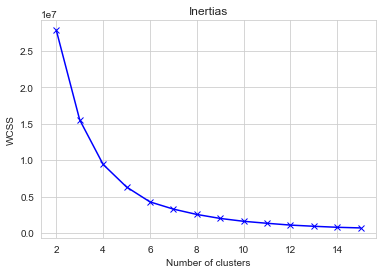

In [129]:
df_cluster_kmeans = score_plot_and_get_best(df_business_dropped_kmeans, "kmeans", np.arange(2, 16))

In [130]:
df_business_merged_dropped_kmeans = add_new_column('kmeans', df_cluster_kmeans, df_business_dropped_kmeans)

In [131]:
df_business_merged_dropped_kmeans.head(5)

,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,stars,street,touristy,trendy,upscale,valet,vegan,vegetarian,video,cluster
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [132]:
df_business_merged_dropped_kmeans.shape

(17934, 58)

In [133]:
df_business_filtered.shape

(9262, 66)

In [138]:
df_business_filtered_dropped_merged_kmeans = pd.merge(df_business_merged_dropped_kmeans, df_business_filtered)

In [139]:
df_business_filtered_dropped_merged_kmeans.head(5)

,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,cluster,address,business_id,categories,city,latitude,longitude,name,postal_code,state
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,5255 E Broadway Blvd,tUFrWirKiKi_TAnsVWINQQ,"Department Stores, Shopping, Fashion, Home & G...",Tucson,32.223236,-110.880452,Target,85711,AZ
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,625 N Stone Ave,rBmpy_Y1UbBx8ggHlyb7hA,"Automotive, Auto Parts & Supplies, Auto Custom...",Tucson,32.229872,-110.972342,Arizona Truck Outfitters,85705,AZ
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,8i6ila3Nc4jinPNHN1dlrQ,"Food, Food Trucks, Restaurants, American (Trad...",Tucson,32.268074,-110.992390,RJ's American Asian,85705,AZ
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,6342 E Calle Bellatrix,kKFvz2WbItYFDo0TL5MuQg,"Event Planning & Services, Photographers",Tucson,32.203074,-110.856299,JW Photography,85710,AZ
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,7937 N Oracle Rd,DhrwdwGXn0i546zhtEX05w,"Gyms, Fitness & Instruction, Trainers, Active ...",Tucson,32.350738,-110.975210,Anytime Fitness,85704,AZ


In [140]:
df_business.to_csv(r'/Users/at181903/PycharmProjects/IAproject/dataset/df_business_filtered_by_city.csv', index=False)

In [136]:
# from sklearn.datasets import load_digits
# from sklearn.decomposition import PCA
#
# # Load Data
# data = load_digits().data
# pca = PCA(2)
#
# print(data)
#
# #Transform the data
# df = pca.fit_transform(data)
#
# #Getting unique labels
# u_labels = np.unique(df_cluster_kmeans)
#
# #plotting the results:
# for i in u_labels:
#     plt.scatter(df[df_cluster_kmeans == i , 0] , df[df_cluster_kmeans == i , 1] , label = i)
#
# plt.legend()
# plt.show()

In [137]:
# plot_clusters('kmeans', df_business_merged_filtered_kmeans, 2, 5, 30, 15)